In [2]:
import pandas as pd
import numpy as np
import seaborn as sp
import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

In [3]:
df=pd.read_csv("forestfires (1).csv")
df

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [4]:
df.isnull().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [5]:
df.duplicated().sum()

8

In [6]:
df.drop_duplicates(inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 509 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          509 non-null    object 
 1   day            509 non-null    object 
 2   FFMC           509 non-null    float64
 3   DMC            509 non-null    float64
 4   DC             509 non-null    float64
 5   ISI            509 non-null    float64
 6   temp           509 non-null    float64
 7   RH             509 non-null    int64  
 8   wind           509 non-null    float64
 9   rain           509 non-null    float64
 10  area           509 non-null    float64
 11  dayfri         509 non-null    int64  
 12  daymon         509 non-null    int64  
 13  daysat         509 non-null    int64  
 14  daysun         509 non-null    int64  
 15  daythu         509 non-null    int64  
 16  daytue         509 non-null    int64  
 17  daywed         509 non-null    int64  
 18  monthapr  

In [8]:
df.size_category.replace(('large','small'),(1,0),inplace=True)

In [9]:
sp.pairplot(df)

Error in callback <function flush_figures at 0x000001C385EA7EE0> (for post_execute):



KeyboardInterrupt



E:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

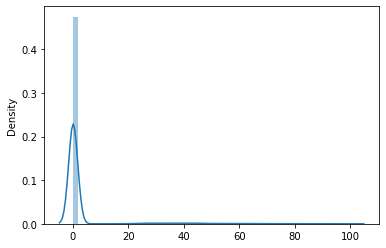

In [25]:
sp.distplot(x)

In [12]:
scale=MinMaxScaler()

E:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

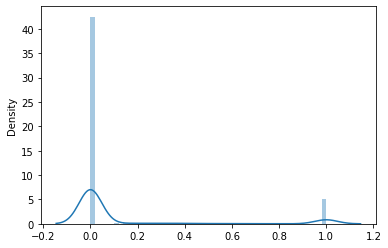

In [13]:
norm=scale.fit_transform(x)
sp.distplot(norm)

In [14]:
x=norm

In [15]:
x=df[[ 'RH', 'dayfri', 'daymon', 'daysat', 'daysun', 'daythu',
       'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb',
       'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep']]
y=df["size_category"]

In [16]:
x.shape

(509, 20)

In [17]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.33)

In [18]:
x_train.shape

(341, 20)

In [19]:
x_test.shape

(168, 20)

In [20]:
model=keras.Sequential([
    keras.layers.Dense(100, input_dim=20,activation="tanh"),
    keras.layers.Dense(50,activation="tanh"),
    keras.layers.Dense(20,activation="tanh"),
    keras.layers.Dense(10,activation="sigmoid")
])

In [21]:
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics="accuracy")

In [22]:
model.fit(x_train,y_train,epochs=25)

Epoch 1/25
11/11 [==============================] - 2s 10ms/step - loss: 1.4552 - accuracy: 0.5337
Epoch 2/25
11/11 [==============================] - 0s 4ms/step - loss: 0.8236 - accuracy: 0.7302
Epoch 3/25
11/11 [==============================] - 0s 5ms/step - loss: 0.7391 - accuracy: 0.7302
Epoch 4/25
11/11 [==============================] - 0s 4ms/step - loss: 0.6996 - accuracy: 0.7302
Epoch 5/25
11/11 [==============================] - 0s 4ms/step - loss: 0.6686 - accuracy: 0.7302
Epoch 6/25
11/11 [==============================] - 0s 5ms/step - loss: 0.6503 - accuracy: 0.7302
Epoch 7/25
11/11 [==============================] - 0s 4ms/step - loss: 0.6379 - accuracy: 0.7302
Epoch 8/25
11/11 [==============================] - 0s 5ms/step - loss: 0.6304 - accuracy: 0.7302
Epoch 9/25
11/11 [==============================] - 0s 5ms/step - loss: 0.6235 - accuracy: 0.7302
Epoch 10/25
11/11 [==============================] - 0s 5ms/step - loss: 0.6177 - accuracy: 0.7302
Epoch 11/25
11/11 

In [23]:
preds=model.predict(x_test)

6/6 [==============================] - 0s 3ms/step


In [24]:
scores = model.evaluate(x_test,y_test)
print(model.metrics_names[1], scores[1]*100)

6/6 [==============================] - 0s 4ms/step - loss: 0.5969 - accuracy: 0.7262
accuracy 72.6190447807312
